In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns   
import math

In [2]:
infori = pd.read_csv('data/Social_Network_Ads.csv')

In [3]:
infori.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(infori[['Age', 'EstimatedSalary']], infori['Purchased'], test_size=0.25, random_state=0)

In [5]:
# For Bayesian Model with continuous data we will use gausian normal distr
# We basically need a lot of metadata regarding counts in classes
# Stuff like mean, and standard deviation

In [6]:
# Do for age

In [7]:
x_train

,Age,EstimatedSalary
250,44,39000
63,32,120000
312,38,50000
159,32,135000
283,52,21000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [8]:
def get_gauss_mat_for_data(x, y):
    num_classes = y.nunique() # rows
    dims = (len(x.columns), 2)
    mat = {}
    for cl in y.unique():
        mat[cl] = {}
        x['y_filter'] = y - cl
        filtered_x = x[x['y_filter'] == 0]
        for col in x.columns[:-1]:
            mat[cl][col] = (filtered_x[col].mean(), filtered_x[col].var())
    x.drop(['y_filter'], axis=1, inplace=True)
    return mat  

In [9]:
info_mat = get_gauss_mat_for_data(x_train, y_train)
info_mat[1]['Age'][1]

73.809009009009

In [10]:
def get_gausian_prob_val(info_mat, class_for, col, v):
    return math.e**-((v - info_mat[class_for][col][0])**2 / (2 * info_mat[class_for][col][1])) / math.sqrt(2 * math.pi * info_mat[class_for][col][1])
    

In [11]:
get_gausian_prob_val(info_mat, 1, 'Age', x_test['Age'].iloc[0])

0.008213860954664979

In [12]:
x_test.iloc[0]['Age']

30

In [13]:
def classify(info_mat, priori_prob_classes, xvals):
    maxclass = None
    maxprob = 0
    for class_k, class_prob in priori_prob_classes.items():
        prob = class_prob
        for col in xvals.index:
            prob *= get_gausian_prob_val(info_mat, class_k, col, xvals[col])
        if(prob > maxprob):
            maxprob = prob
            maxclass = class_k
    return maxclass

In [14]:
even_priori_probability = {0: 0.5, 1: 0.5}

In [15]:
classify(info_mat, even_priori_probability, x_test.iloc[0])

0

In [16]:
classify(info_mat, even_priori_probability, x_test.iloc[1])

0

In [17]:
pred0 = x_train.apply(lambda x: classify(info_mat, even_priori_probability, x), axis=1)

In [18]:
pred1 = x_test.apply(lambda x: classify(info_mat, even_priori_probability, x), axis=1)

In [19]:
from sklearn import metrics

In [20]:
metrics.accuracy_score(y_test, pred1)

0.92

In [21]:
metrics.confusion_matrix(y_test, pred1)

array([[63,  5],
       [ 3, 29]])

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
mdl = GaussianNB()

In [24]:
mdl.fit(x_train, y_train)

GaussianNB()

In [25]:
pred2 = mdl.predict(x_test)

In [26]:
metrics.accuracy_score(y_test, pred2)

0.9

In [27]:
infori = pd.read_csv('data/winequality-red.csv')

In [28]:
infori.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [29]:
x_train, x_test, y_train, y_test = train_test_split(infori[infori.columns[0:11]], infori['quality'], test_size=0.25, random_state=0)

In [30]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
140,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.99650,3.19,0.82,9.6
1232,7.6,0.430,0.29,2.1,0.075,19.0,66.0,0.99718,3.40,0.64,9.5
720,8.4,0.560,0.04,2.0,0.082,10.0,22.0,0.99760,3.22,0.44,9.6
77,6.8,0.785,0.00,2.4,0.104,14.0,30.0,0.99660,3.52,0.55,10.7
39,7.3,0.450,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.5
...,...,...,...,...,...,...,...,...,...,...,...
763,9.3,0.655,0.26,2.0,0.096,5.0,35.0,0.99738,3.25,0.42,9.6
835,7.6,0.665,0.10,1.5,0.066,27.0,55.0,0.99655,3.39,0.51,9.3
1216,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5
559,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7


In [31]:
y_train

140     5
1232    5
720     5
77      6
39      5
       ..
763     5
835     5
1216    6
559     6
684     5
Name: quality, Length: 1199, dtype: int64

In [32]:
info_mat = get_gauss_mat_for_data(x_train, y_train)
info_mat

{5: {'fixed acidity': (8.156640624999998, 2.3794861484833665),
  'volatile acidity': (0.578759765625, 0.02812482867156923),
  'citric acid': (0.24244140625, 0.03142357777336105),
  'residual sugar': (2.5508789062500004, 2.125023687851639),
  'chlorides': (0.09178320312499999, 0.0028532660186827295),
  'free sulfur dioxide': (17.501953125, 126.92367523850294),
  'total sulfur dioxide': (58.001953125, 1443.7661409919276),
  'density': (0.9970811328125, 2.615583841426125e-06),
  'pH': (3.3055273437499997, 0.022443165591364965),
  'sulphates': (0.618125, 0.03071663405088063),
  'alcohol': (9.89697265625, 0.5586649855522261)},
 6: {'fixed acidity': (8.395940170940172, 3.2431740606526476),
  'volatile acidity': (0.5036645299145299, 0.026884990002562274),
  'citric acid': (0.27384615384615385, 0.03910209191237028),
  'residual sugar': (2.501923076923077, 2.419664388074452),
  'chlorides': (0.08515598290598289, 0.001692093390252384),
  'free sulfur dioxide': (15.636752136752136, 99.25534874357

In [33]:
even_priori_probability = {3: 0.1, 4: 0.1, 5: 0.1, 6: 0.1, 7: 0.1, 8: 0.1}

In [34]:
x_test.iloc[0]

fixed acidity           10.8000
volatile acidity         0.4700
citric acid              0.4300
residual sugar           2.1000
chlorides                0.1710
free sulfur dioxide     27.0000
total sulfur dioxide    66.0000
density                  0.9982
pH                       3.1700
sulphates                0.7600
alcohol                 10.8000
Name: 1109, dtype: float64

In [35]:
classify(info_mat, even_priori_probability, x_test.iloc[0])

5

In [36]:
pred0 = x_train.apply(lambda x: classify(info_mat, even_priori_probability, x), axis=1)

In [37]:
pred1 = x_test.apply(lambda x: classify(info_mat, even_priori_probability, x), axis=1)

In [38]:
metrics.accuracy_score(y_train, pred0)

0.3703085904920767

In [39]:
metrics.accuracy_score(y_test, pred1)

0.315

In [40]:
mdl = GaussianNB()

In [41]:
mdl.fit(x_train, y_train)

GaussianNB()

In [42]:
pred3 = mdl.predict(x_test)

In [43]:
metrics.accuracy_score(y_test, pred3)

0.55

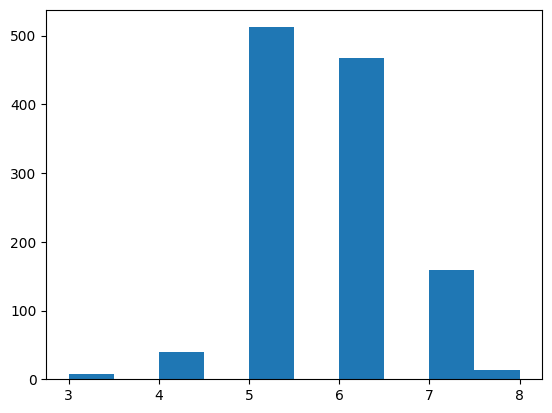

In [44]:
# our priori probability was off, base probability off of this
yvals, xvals, _ = plt.hist(y_train)

In [45]:
xvals, yvals

(array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 array([  8.,   0.,  39.,   0., 512.,   0., 468.,   0., 159.,  13.]))

In [46]:
total = np.sum(yvals)

In [47]:
edu_prob = {}
for x, y in zip(xvals, yvals):
    if x.is_integer():
        edu_prob[int(x)] = y / total

In [48]:
edu_prob

{3: 0.006672226855713094,
 4: 0.03252710592160134,
 5: 0.427022518765638,
 6: 0.390325271059216,
 7: 0.13261050875729774}

In [49]:
# double check
np.sum(np.fromiter(edu_prob.values(), dtype=np.float64))

0.9891576313594661

In [50]:
# close enough
pred1 = x_test.apply(lambda x: classify(info_mat, edu_prob, x), axis=1)

In [51]:
metrics.accuracy_score(y_test, pred1)

0.555

In [52]:
# Achieved similar performance to library built in